In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# 1. Load DataSets
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Decision Tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train,y_train)

# Predict and Evaluation
y_pred_tree = single_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree (Bagging) Accuracy: {accuracy_tree:.2f}")

Training samples: 120
Testing samples: 30
Decision Tree (Bagging) Accuracy: 1.00


# 1. Visualize the Decision Tree Structure

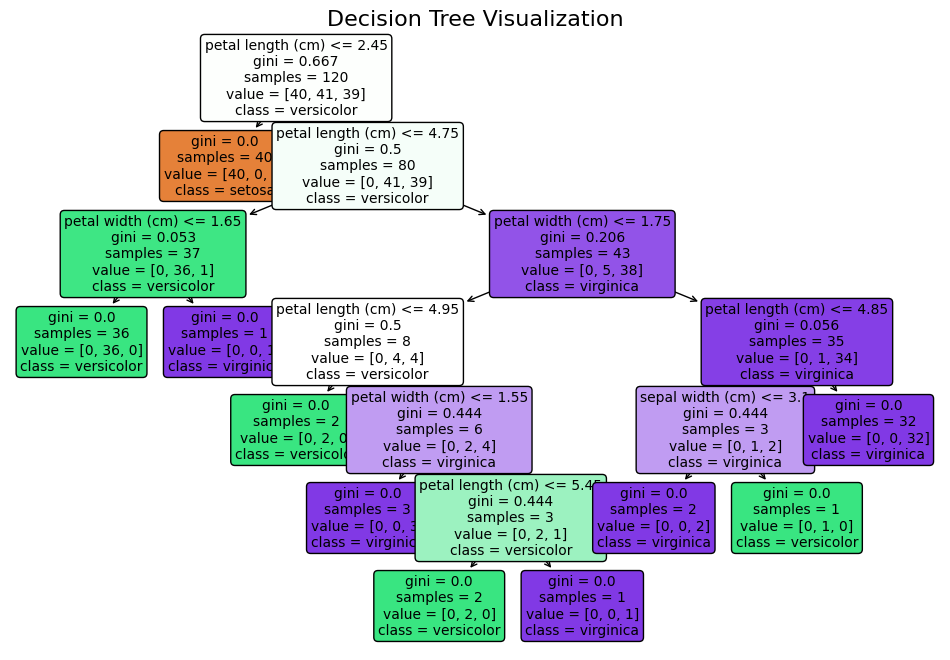

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# 2. Feature Importance Visualization

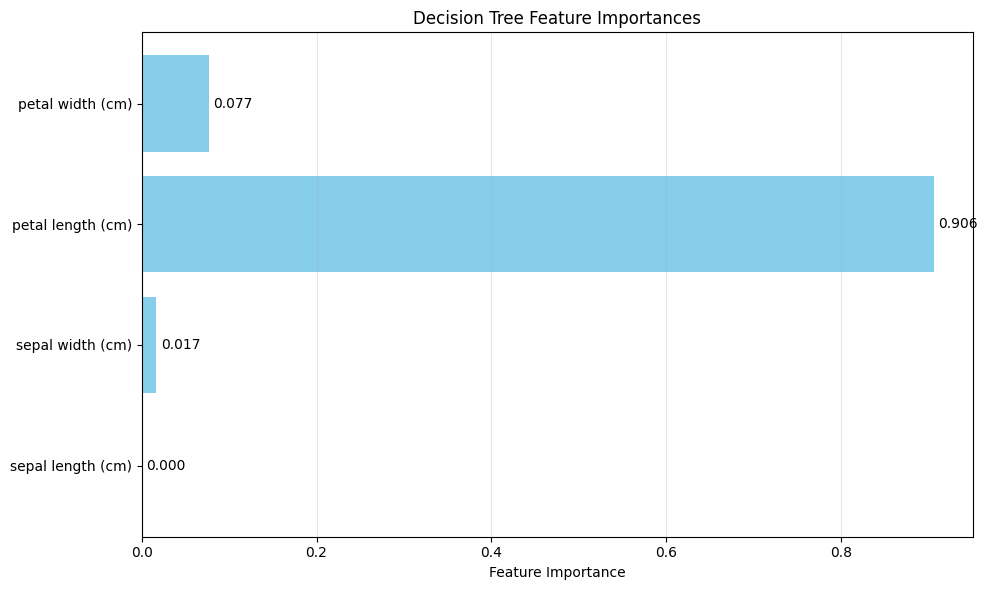

In [3]:
# Get feature importances
importances = single_tree.feature_importances_
feature_names = iris.feature_names

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(importances)), importances, color='skyblue')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.grid(axis='x', alpha=0.3)

# Add values on the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{importances[i]:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# 3. Decision Boundary Visualization (for 2 features)

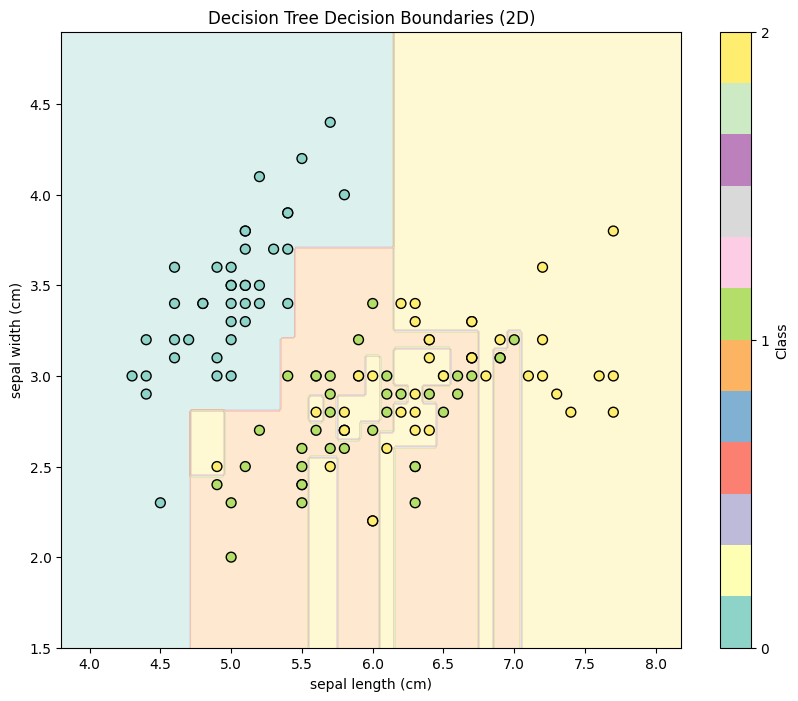

In [4]:
# Select two features for visualization
feature1, feature2 = 0, 1  # sepal length and sepal width

# Train a new tree on just two features for visualization
X_train_2d = X_train[:, [feature1, feature2]]
X_test_2d = X_test[:, [feature1, feature2]]

tree_2d = DecisionTreeClassifier(random_state=42)
tree_2d.fit(X_train_2d, y_train)

# Create mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in mesh grid
Z = tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
            edgecolor='black', s=50, cmap='Set3')
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title('Decision Tree Decision Boundaries (2D)')
plt.colorbar(ticks=[0, 1, 2], label='Class')
plt.show()

# 4. Compare Multiple Models Visualization

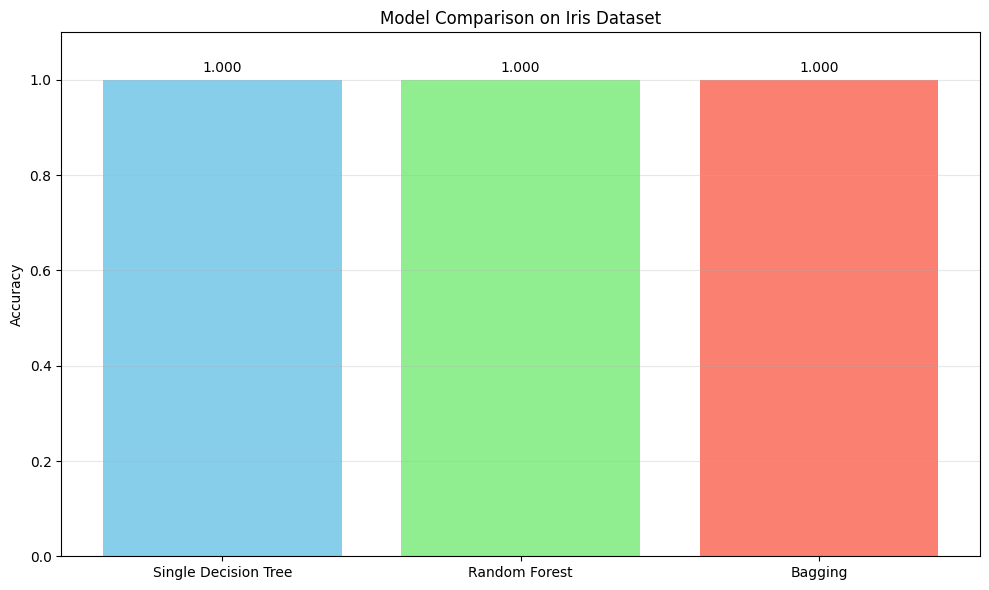

Decision Tree Accuracy: 1.000
Random Forest Accuracy: 1.000
Bagging Accuracy: 1.000


In [5]:
# First, complete code to train all models
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Bagging (with Decision Tree as base estimator)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=100, 
                            random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

# Compare accuracies
models = ['Single Decision Tree', 'Random Forest', 'Bagging']
accuracies = [accuracy_tree, accuracy_rf, accuracy_bag]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.title('Model Comparison on Iris Dataset')
plt.grid(axis='y', alpha=0.3)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Decision Tree Accuracy: {accuracy_tree:.3f}")
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")
print(f"Bagging Accuracy: {accuracy_bag:.3f}")